# Multiple Linear Regression - Used Car

In this notebook, you will use data about cars to help predict the price of used cars.

1. car_id: unique id for each car sold 
2. name: Make and model of the car
3. fueltype: gas or diesel
4. enginelocation: front or back
5. wheelbase: distance between the front and back wheels (inches)
6. carlength: length of the car (inches)
7. carheight: height of the car (inches)
8. curbweight: weight of the car with a full tank of gas (pounds)
9. enginetype: 'dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'
10. enginesize: size of the engine (cubic inches)
11. stroke: distance the piston travels along the cylinder (inches)
12. compressionratio: the volume of the cylinder with the pistons at the bottom
versus the volumn with the pistons at the top 
13. horsepower
14. peakrpm: top revolutions per minute (rpm) of the engine
15. citympg: average miles per gallon in the city
16. highwaympg: average miles per gallon on a highway
17. price


## 1. Library Imports and Data Loading

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("data/car.csv")

## 2. Determine if we can use Multiple Linear Regression
* Data must be quantitative
* Data must have a linear relationship
* Residuals must be normally distributed
* There should be no meaningful correlation between independent variables

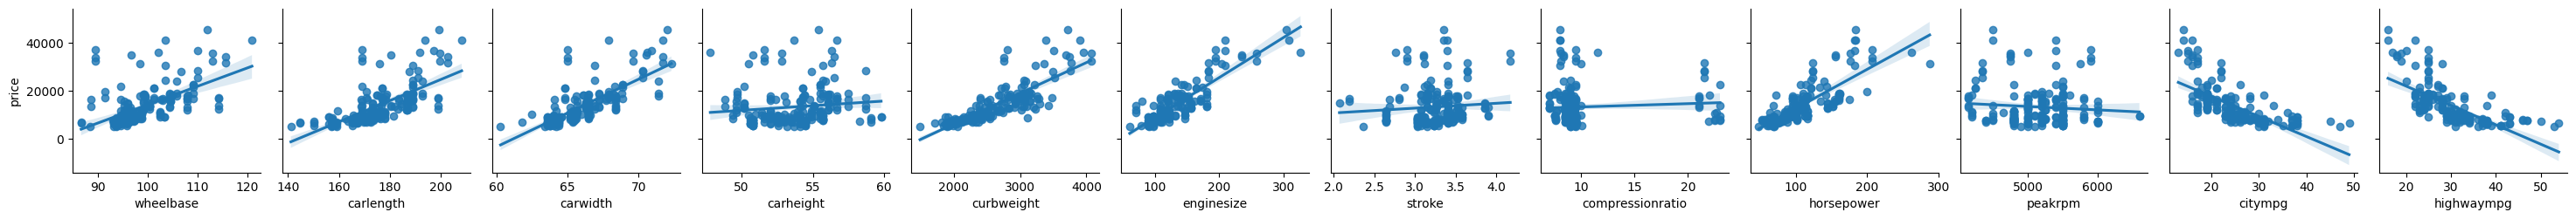

In [5]:
### CHECK #1: Check which of the columns are quantitative ###

# Get first 10 rows of data to analyze type of data
df.head()

# Price, wheelbase, carlength, carwidth, carheight, curbweight, enginesize, stroke, compressionratio, horsepower, 
# peakrpm, citympg, and highwaympg are all quantitative values, so we can use them when building a regression model.

# name, fueltype, enginelocation, and enginetype are all non-quantitative values, so we cannot use them when building
# a regression model.

### CHECK #2: Verify which quantitative values have linearity w/ price ###

sns.pairplot(df, x_vars=["wheelbase", 'carlength', "carwidth", "carheight", "curbweight", "enginesize", "stroke",
                          "compressionratio", "horsepower", "peakrpm", "citympg", 'highwaympg'], y_vars=["price"], kind="reg")

# wheelbase, carlength, carwidth, curbweight, enginesize, horsepower, citympg, highwaympg are all linear!

# carheight, stroke, compressionratio, peakrpm aren't linear.





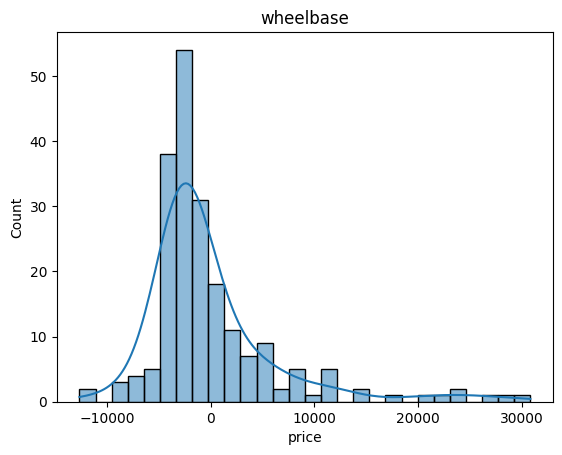

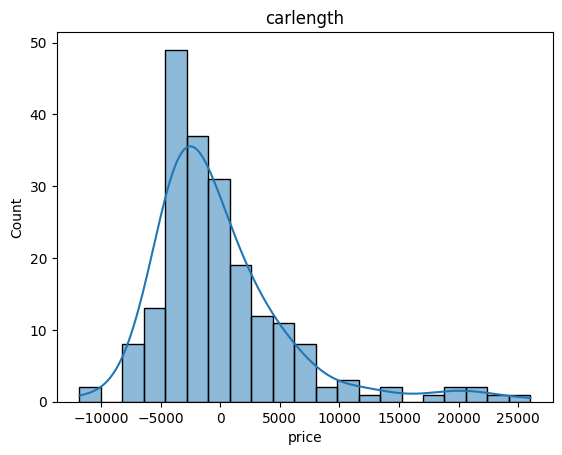

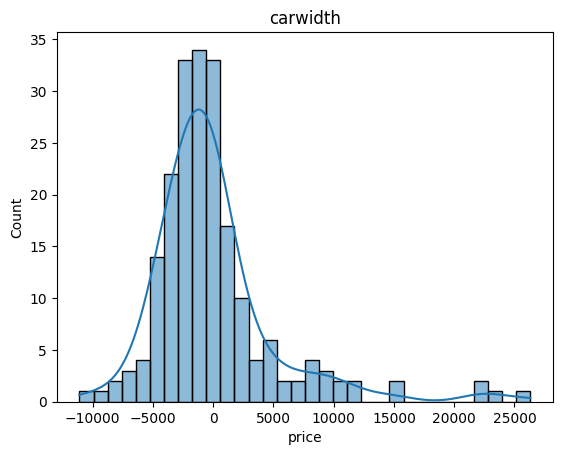

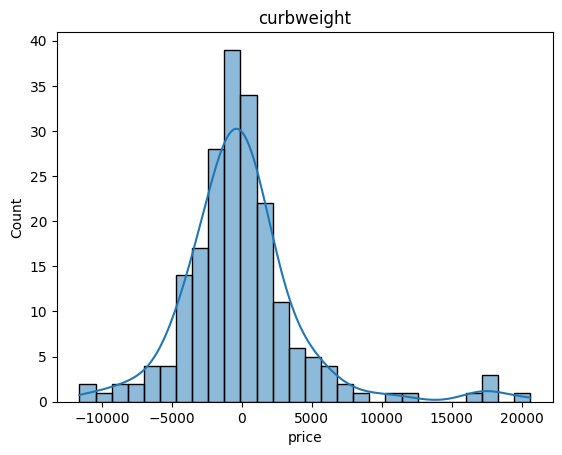

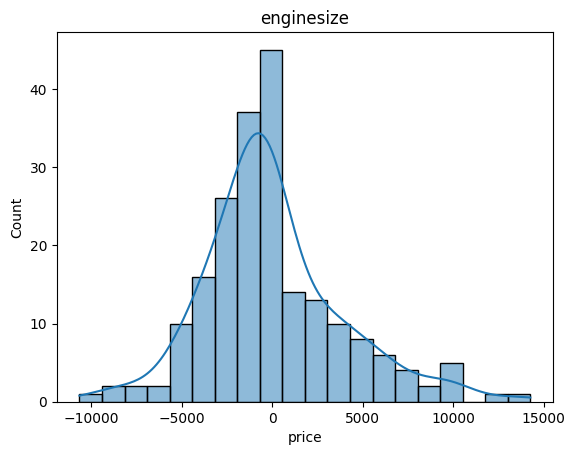

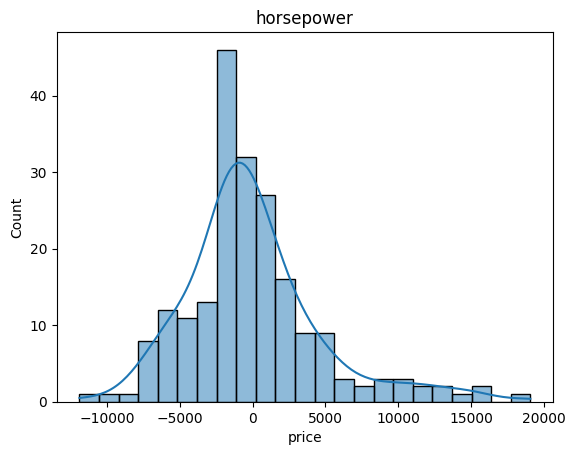

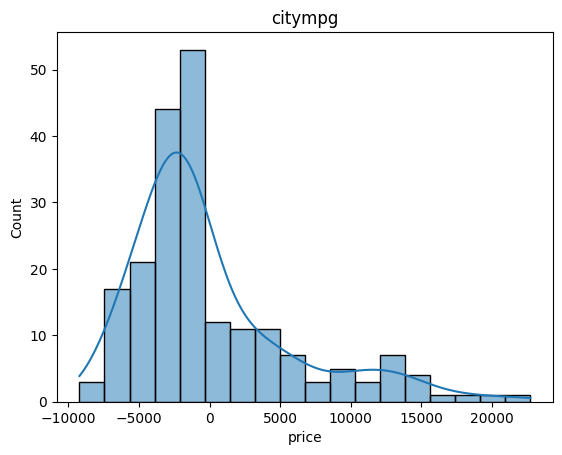

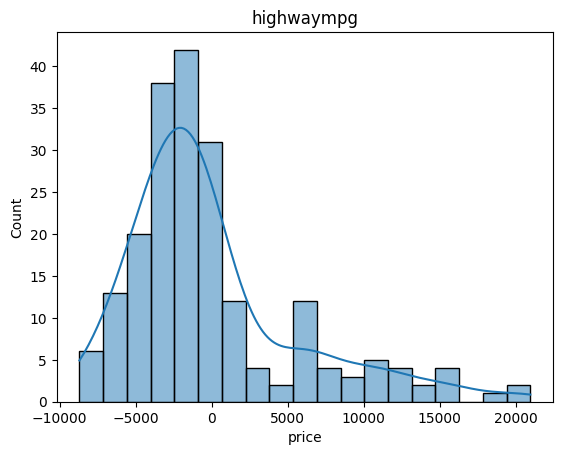

In [6]:
### CHECK #3: Check for normal distribution of residuals ###
linear_quantitative_features = ["wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "horsepower", "citympg", "highwaympg"]

for feature in linear_quantitative_features:
    model = LinearRegression()
    model.fit(df[[feature]], df['price'])
    y_pred = model.predict(df[[feature]])
    residuals = df['price'] - y_pred
    sns.histplot(residuals, kde=True)
    plt.title(feature)
    plt.show()

# wheelbase, carlength, carwidth, curbweight, enginesize, horsepower look fairly good. citympg, highwaympg, could work, but they don't look nearly as good as the others.
# However, I will stile take these two features into consideration when going through feature selection.

<Axes: >

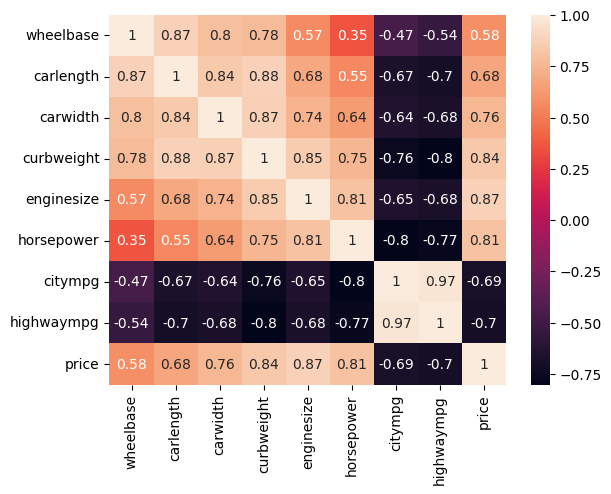

In [46]:
### CHECK #4: Check for high correlation between variables ###
linear_quantitative_df = df[["wheelbase",
                             "carlength",
                             "carwidth",
                             "curbweight",
                             "enginesize",
                             "horsepower",
                             "citympg",
                             "highwaympg",
                             "price",
                             ]]

sns.heatmap(linear_quantitative_df.corr(), annot=True)

# citympg and highwaympg are highly correlated (0.97) so drop citympg.
# carwidth & carlength are highly correlated (0.84) so drop carlength.
# carwidth & wheelbase are highly correlated (0.80) so drop wheelbase.
# enginesize & curbweight are highly correlated (0.85) so drop curbweight.
# horsepower & enginesize are highly correlated (0.81) so drop horsepower.
# carwidth & enginesize are highly correlated (0.74) so drop carwidth.
# enginesize & highwaympg are highly correlated (-0.68) so drop highwaympg.

# Only 1 feature is left. This dataset may not be fit for a linear regression model.

## 3. Feature Selection

In [29]:
# Backwards selection of features
selected_features = ["wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "horsepower", "citympg", "highwaympg"]
model = LinearRegression()
y_train = df['price']

while (len(selected_features) > 1):

    # Get initial score with current model
    X_train = df[selected_features]
    model.fit(X_train, y_train)
    initial_score = model.score(X_train, y_train)

    # Create variables for variable removal
    worst_feature = ""
    worst_score = 1

    # Find worst feature
    for feature in selected_features:
        selected_features_temp = selected_features.copy()
        selected_features_temp.remove(feature)

        X_train_temp = df[selected_features_temp]
        model.fit(X_train_temp, y_train)
        score = model.score(X_train_temp, y_train)

        if score < worst_score:
            worst_score = score
            worst_feature = feature
    
    # Check if feature is impactful enough to remove
    if (initial_score - worst_score) < 0.05:
        print("Dropped:", worst_feature, "(Score:", str(worst_score) + ")")
        selected_features.remove(worst_feature)
    else:
        print("Final Feature Set:", selected_features)
        print("Final Feature Score:", initial_score)
        break




Dropped: enginesize (Score: 0.7865744557179934)
Final Feature Set: ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'horsepower', 'citympg', 'highwaympg']
Final Feature Score: 0.7865744557179934


## 4. Create Final Model based off of feature selection

In [42]:
final_model = LinearRegression()
final_X_train = df[selected_features]
final_model.fit(final_X_train, y_train)

LinearRegression()

## 5. Check Residuals

<Axes: xlabel='price', ylabel='Count'>

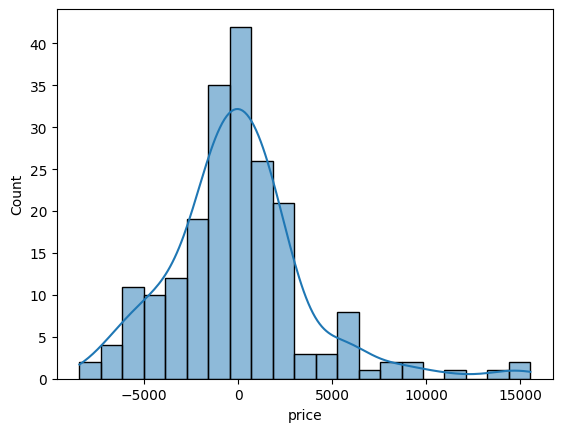

In [43]:
y_pred = final_model.predict(final_X_train)
final_residuals = y_train - y_pred
sns.histplot(final_residuals, kde=True)

## 6. Evaluate R^2

In [45]:
print("Final Model R^2:", final_model.score(final_X_train, y_train))

Final Model R^2: 0.7865744557179934


The model seems to be fairly reliable, as the R^2 is quite high (but not too high). However, we did notice during model developement that nearly all of the variables where highly correlated to each other. This could lead to an innacurate model, as regression assumes that variables are not correlated to each other (i.e. completely independent).